In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('mushroom.csv')

In [3]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [6]:
df[df.duplicated()]

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
34,1279,bell,smooth,pink,no,foul,notched,distant,broad,pink,...,universal,brown,one,zone,black,scattered,leaves,poisonous,5.291009,5.436304
70,1275,sunken,scaly,yellow,no,pungent,descending,distant,narrow,orange,...,partial,white,none,zone,white,numerous,leaves,poisonous,4.746453,10.769935
76,549,conical,grooves,brown,no,foul,free,distant,broad,white,...,partial,yellow,two,large,chocolate,solitary,woods,poisonous,12.206952,5.061715
109,1198,sunken,smooth,white,no,anise,attached,crowded,broad,black,...,partial,brown,two,sheathing,black,solitary,woods,edible,13.214007,14.549171
127,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,618,flat,grooves,green,yes,musty,notched,crowded,broad,chocolate,...,universal,yellow,one,zone,brown,abundant,meadows,poisonous,14.834383,2.053744
1994,871,flat,scaly,pink,no,spicy,attached,distant,narrow,red,...,universal,brown,two,zone,brown,abundant,meadows,poisonous,4.794826,4.576464
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020


In [7]:
df.drop_duplicates(keep='first',inplace=True)

In [8]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,877,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,...,universal,brown,none,large,brown,numerous,paths,edible,13.020616,9.993008
1988,926,bell,grooves,pink,yes,anise,descending,distant,broad,brown,...,partial,brown,two,pendant,yellow,numerous,grasses,poisonous,3.751597,18.868135
1989,289,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,...,universal,orange,two,none,orange,abundant,grasses,edible,13.134058,15.740028
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957


In [9]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,tapering,...,universal,brown,none,large,brown,numerous,paths,edible,13.020616,9.993008
1988,bell,grooves,pink,yes,anise,descending,distant,broad,brown,enlarging,...,partial,brown,two,pendant,yellow,numerous,grasses,poisonous,3.751597,18.868135
1989,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,tapering,...,universal,orange,two,none,orange,abundant,grasses,edible,13.134058,15.740028
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957


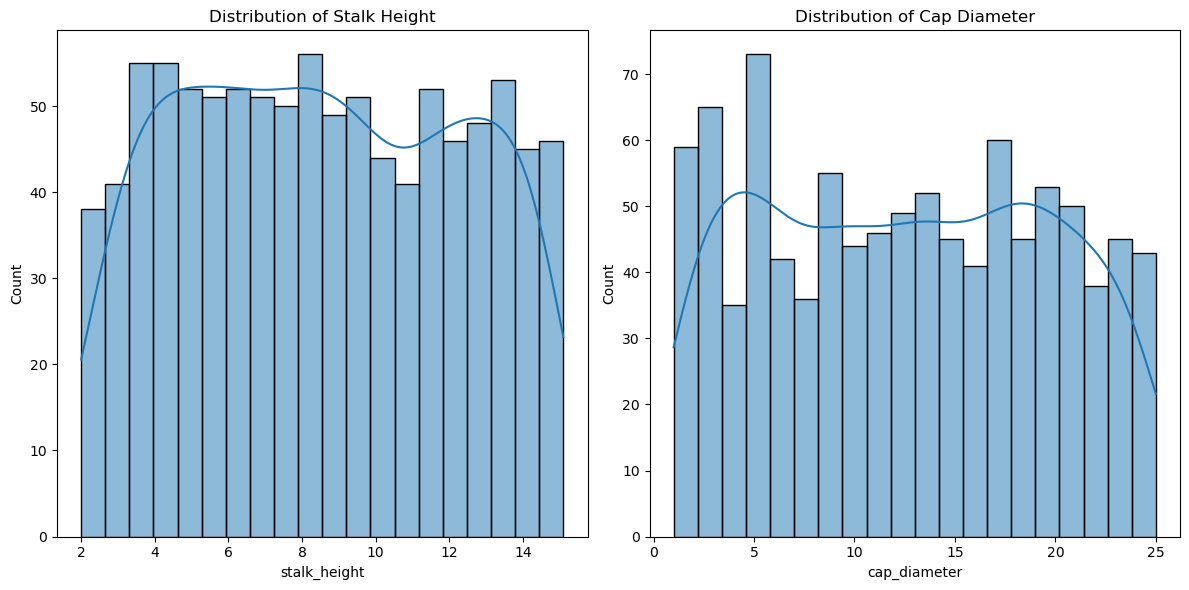

In [11]:
# Plotting histograms for numerical features
plt.figure(figsize=(12,6))

# Histogram for stalk_height
plt.subplot(1,2,1)
sns.histplot(df['stalk_height'],kde=True,bins=20)
plt.title('Distribution of Stalk Height')

# Histogram for cap_diameter
plt.subplot(1,2,2)
sns.histplot(df['cap_diameter'],kde=True,bins=20)
plt.title('Distribution of Cap Diameter')

plt.tight_layout()
plt.show()

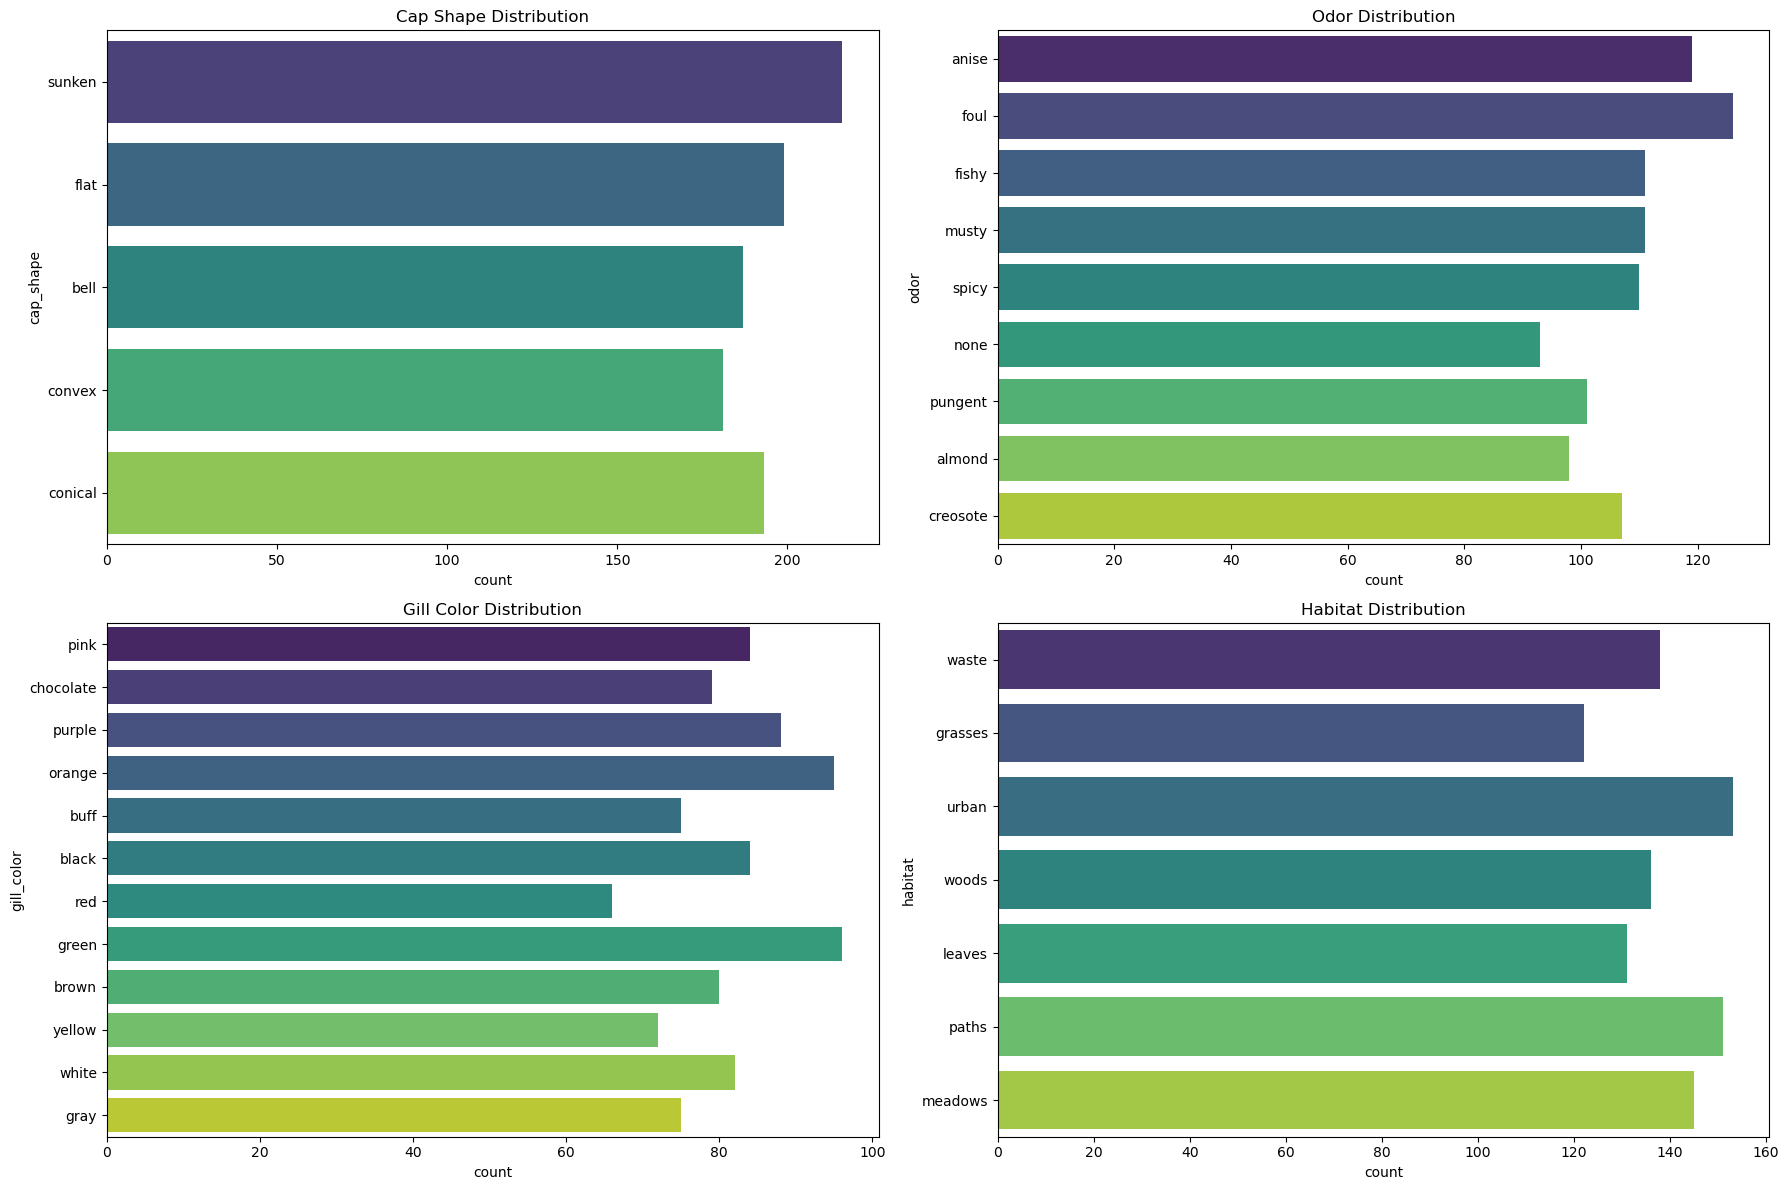

In [12]:
# Plotting count plots for some categorical features
plt.figure(figsize=(18,12))

# Count plot for cap_shape
plt.subplot(2,2,1)
sns.countplot(y=df['cap_shape'],palette='viridis')
plt.title('Cap Shape Distribution')

# Count plot for odor
plt.subplot(2,2,2)
sns.countplot(y=df['odor'],palette='viridis')
plt.title('Odor Distribution')

# Count plot for gill_color
plt.subplot(2,2,3)
sns.countplot(y=df['gill_color'],palette='viridis')
plt.title('Gill Color Distribution')

# Count plot for habitat
plt.subplot(2,2,4)
sns.countplot(y=df['habitat'],palette='viridis')
plt.title('Habitat Distribution')

plt.tight_layout()
plt.show()

In [13]:
label_enc=LabelEncoder()
label_enc

LabelEncoder()

In [14]:
columns_to_encode=['cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat','class']

In [15]:
for col in columns_to_encode:
    label_enc=LabelEncoder()
    df[col]=label_enc.fit_transform(df[col])

In [16]:
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,1,1,0,0,4,3,1,0,3,1,...,1,0,0,3,1,2,3,0,13.020616,9.993008
1988,0,1,4,1,1,1,2,0,1,0,...,0,0,2,5,8,2,0,1,3.751597,18.868135
1989,4,3,5,1,1,1,1,1,2,1,...,1,1,2,4,5,0,0,0,13.134058,15.740028
1996,4,2,5,1,5,0,2,1,9,1,...,0,2,1,7,8,2,5,1,6.500840,13.501957


In [17]:
correlation_matrix=df.corr()

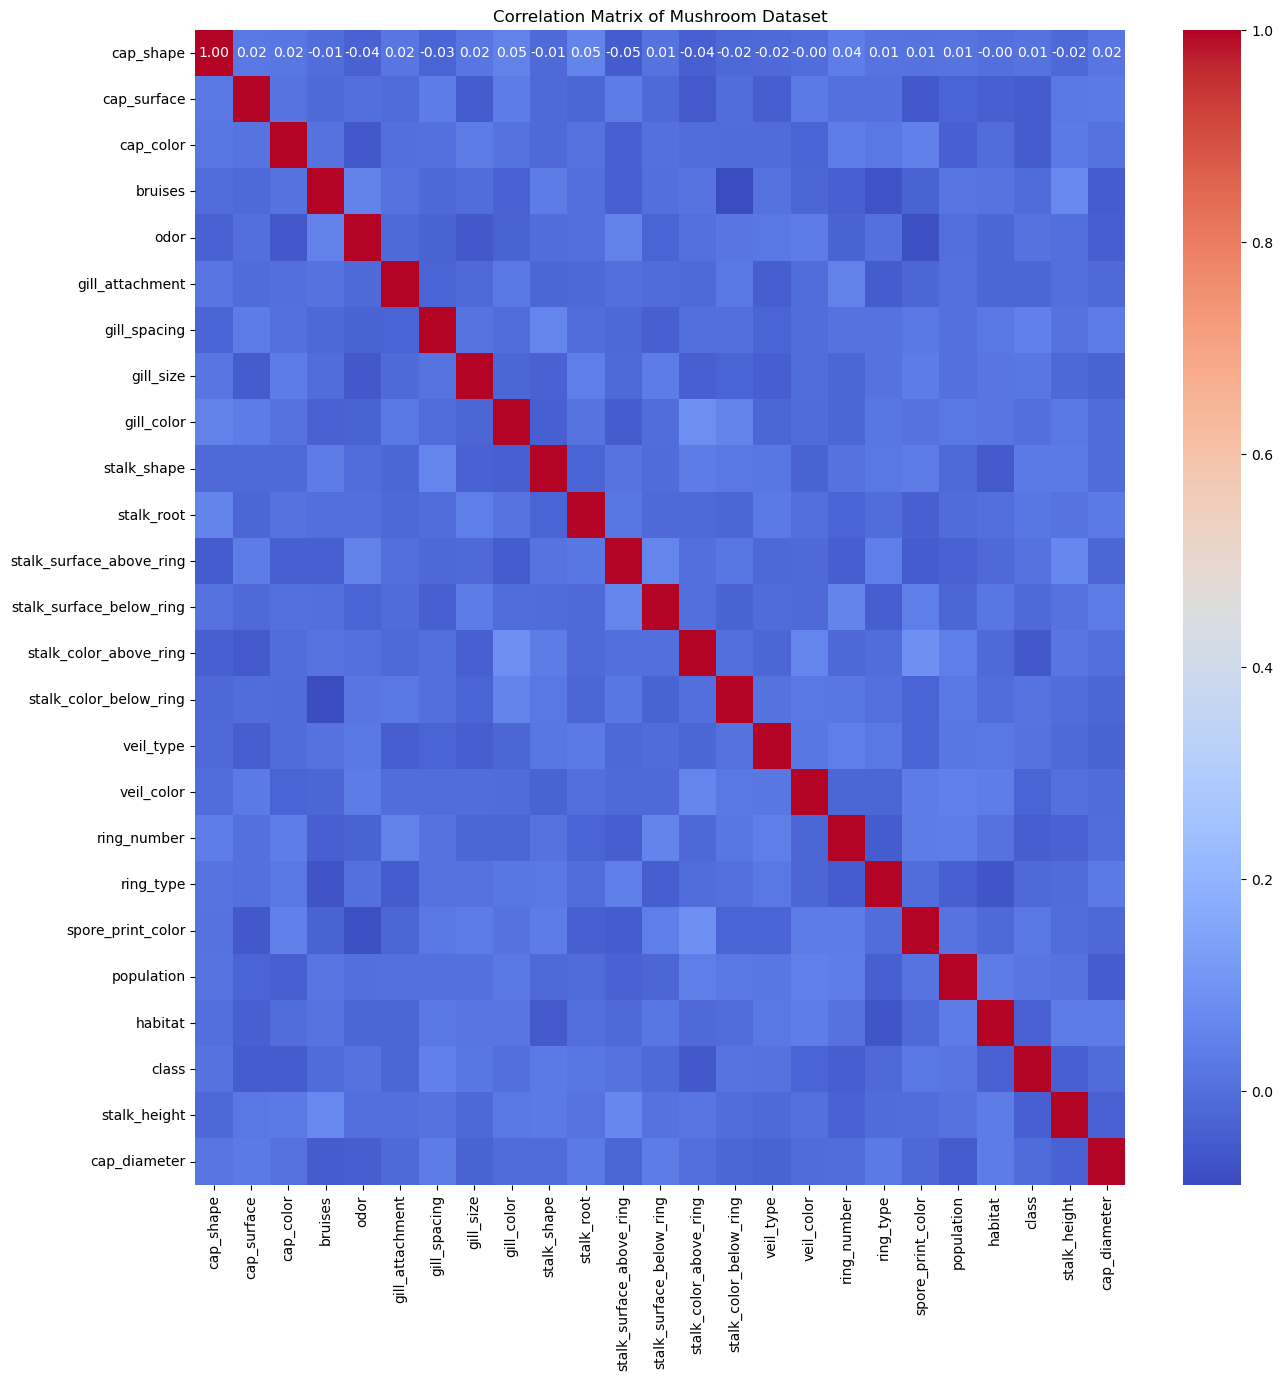

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",xticklabels=True,yticklabels=True)
plt.title('Correlation Matrix of Mushroom Dataset')
plt.show()

In [19]:
target=df[['class']]
target.head()

,class
0,1
1,0
2,1
3,1
4,1


In [20]:
features=df.drop('class',axis=1)
features

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,8,0,0,2,6,3,1,5,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,0,1,0,2,6,1,2,5,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,3,1,3,2,6,6,0,5,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,5,0,3,2,0,4,1,0,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,7,1,2,0,4,8,1,4,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,1,1,0,0,4,3,1,0,3,1,...,8,1,0,0,3,1,2,3,13.020616,9.993008
1988,0,1,4,1,1,1,2,0,1,0,...,5,0,0,2,5,8,2,0,3.751597,18.868135
1989,4,3,5,1,1,1,1,1,2,1,...,6,1,1,2,4,5,0,0,13.134058,15.740028
1996,4,2,5,1,5,0,2,1,9,1,...,4,0,2,1,7,8,2,5,6.500840,13.501957


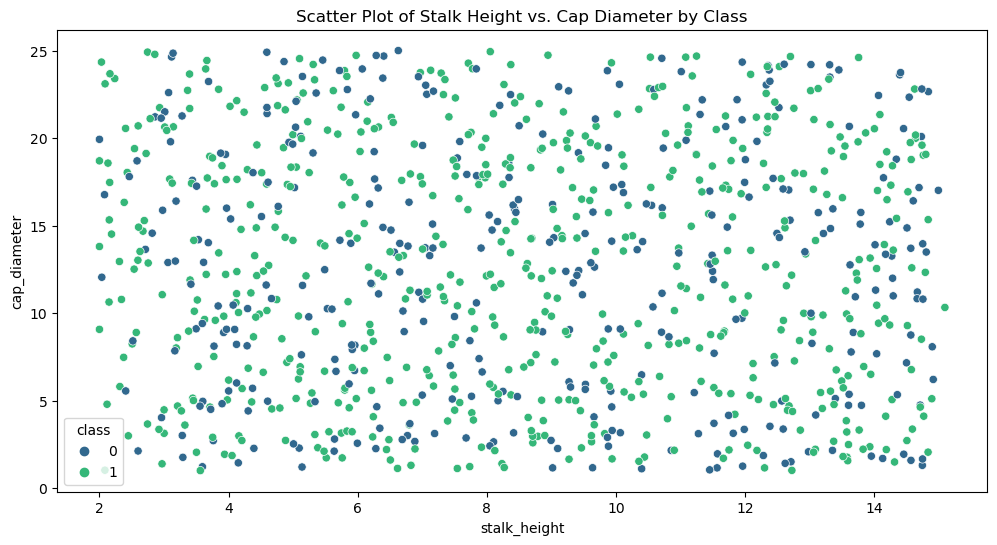

In [21]:
# Scatter plot for numerical features colored by class
plt.figure(figsize=(12,6))

# Scatter plot for stalk_height vs. cap_diameter
sns.scatterplot(x='stalk_height',y='cap_diameter',hue='class',data=df,palette='viridis')
plt.title('Scatter Plot of Stalk Height vs. Cap Diameter by Class')
plt.show()

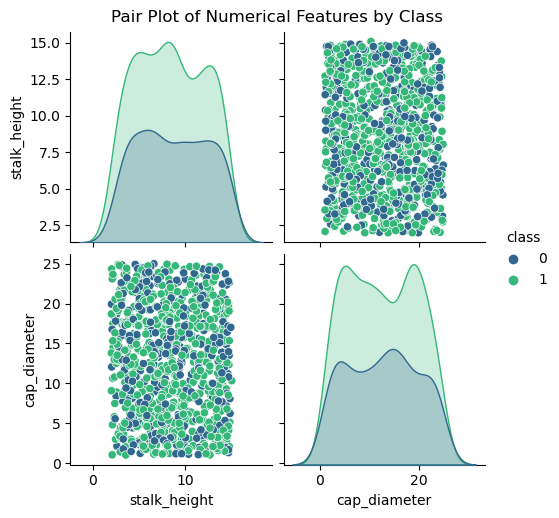

In [22]:
# Pair plot to visualize pairwise relationships between numerical features
sns.pairplot(df,hue='class',vars=['stalk_height','cap_diameter'],palette='viridis')
plt.suptitle('Pair Plot of Numerical Features by Class',y=1.02)
plt.show()

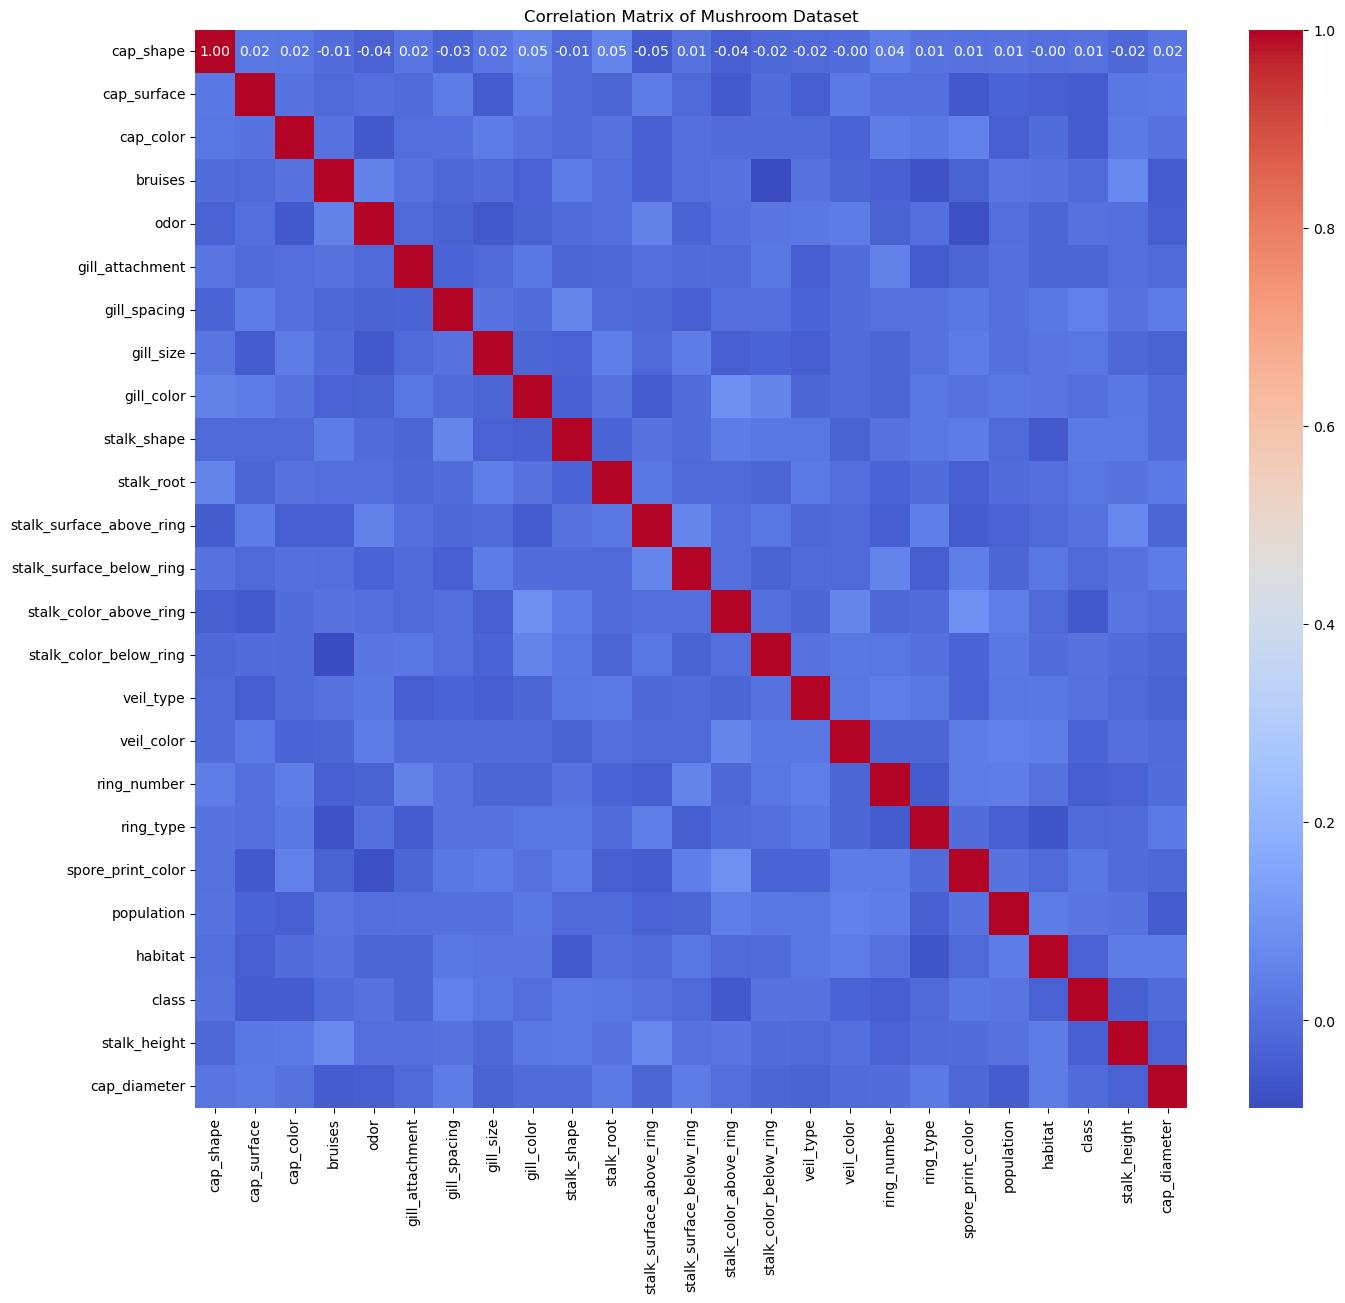

In [23]:
# Correlation heatmap to explore relationships between features and target
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix of Mushroom Dataset')
plt.show()

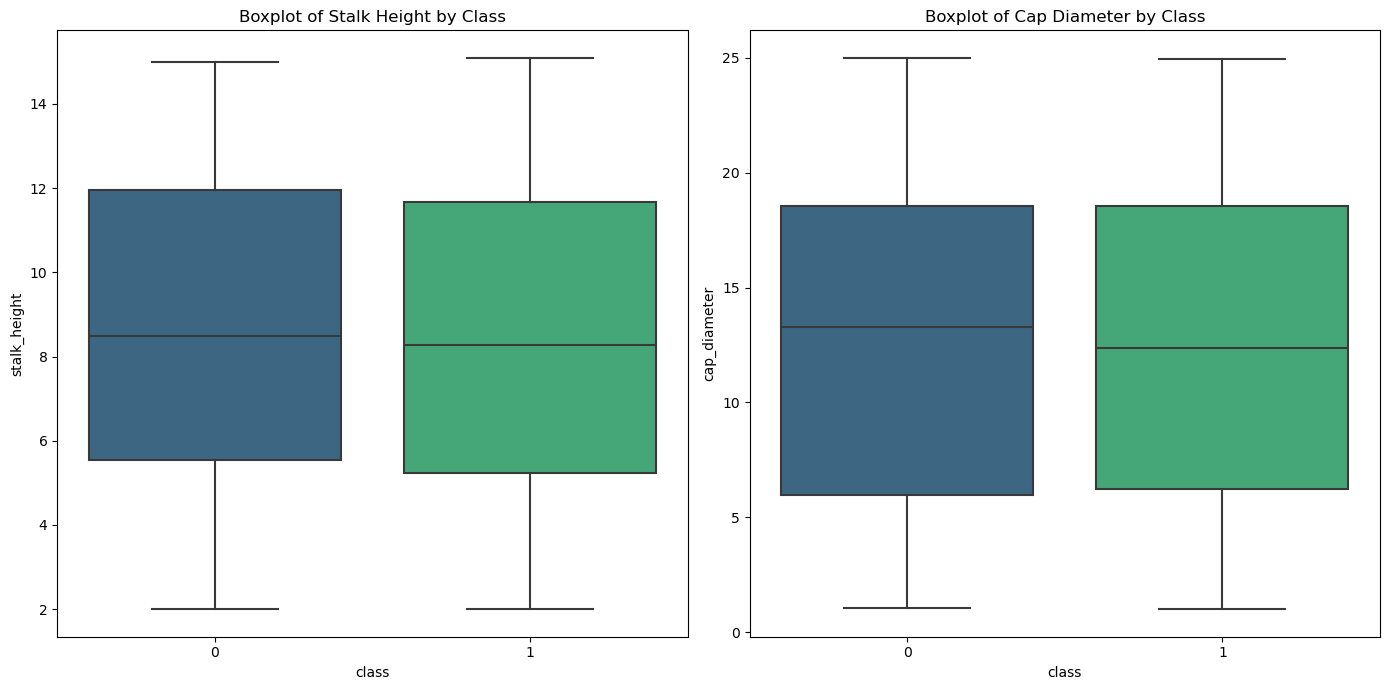

In [58]:
# Boxplot to compare distributions of numerical features across classes
plt.figure(figsize=(14, 7))

# Boxplot for stalk_height by class
plt.subplot(1,2,1)
sns.boxplot(x='class',y='stalk_height',data=df,palette='viridis')
plt.title('Boxplot of Stalk Height by Class')

# Boxplot for cap_diameter by class
plt.subplot(1,2,2)
sns.boxplot(x='class',y='cap_diameter',data=df,palette='viridis')
plt.title('Boxplot of Cap Diameter by Class')

plt.tight_layout()
plt.show()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
vif_data=pd.DataFrame()

In [27]:
vif_data['features']=features.columns

In [28]:
vif_data['Vif_values']=[variance_inflation_factor(features,i)for i in range(len(features.columns))]

In [29]:
vif_data

,features,Vif_values
0,cap_shape,3.016663
1,cap_surface,2.903047
2,cap_color,3.151685
3,bruises,2.054691
4,odor,3.255787
5,gill_attachment,2.766352
6,gill_spacing,2.468586
7,gill_size,2.013621
8,gill_color,3.547378
9,stalk_shape,1.867722


In [30]:
std_sca=StandardScaler()

In [31]:
std_sca.fit_transform(features)

array([[ 1.35139853,  0.41028546,  1.17233895, ...,  0.99462141,
         1.55397552, -1.08020133],
       [ 1.35139853, -1.40576266,  0.79119211, ...,  0.99462141,
        -1.23528506,  0.92643459],
       [ 0.65279421, -0.4977386 ,  0.41004527, ...,  0.99462141,
         0.14308581, -0.77220366],
       ...,
       [ 1.35139853,  1.31830952,  0.41004527, ..., -1.57622207,
         1.24539141,  0.44984086],
       [ 1.35139853,  0.41028546,  0.41004527, ...,  0.99462141,
        -0.54681571,  0.12936088],
       [-0.04581012,  0.41028546,  1.55348579, ...,  0.48045272,
         1.22711479,  1.21115202]])

In [32]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=100)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(683, 24)
(293, 24)
(683, 1)
(293, 1)


In [34]:
svc=SVC(C=1,kernel='rbf',gamma=0.1)

In [35]:
svc.fit(x_train,y_train)

SVC(C=1, gamma=0.1)

In [36]:
y_pred=svc.predict(x_test)

In [37]:
accuracy_rbf=accuracy_score(y_test,y_pred)
accuracy_rbf

0.6245733788395904

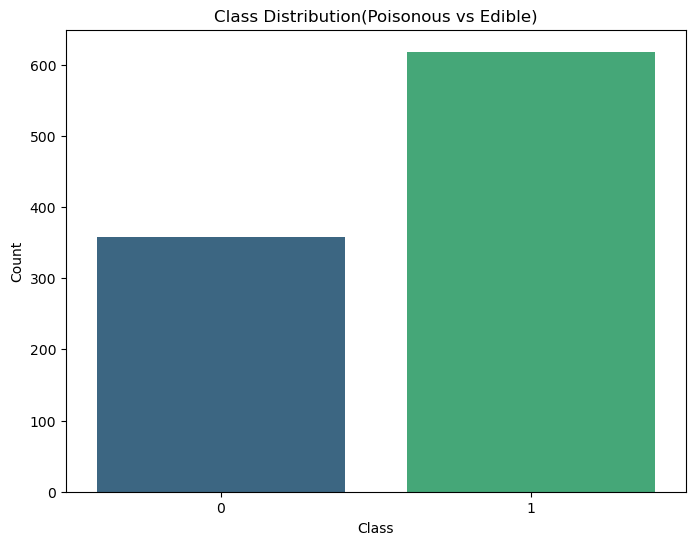

In [38]:
# Count plot for the target variable 'class'
plt.figure(figsize=(8,6))
sns.countplot(x='class',data=df,palette='viridis')
plt.title('Class Distribution(Poisonous vs Edible)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [39]:
# Displaying percentage distribution of the classes
class_counts=df['class'].value_counts(normalize=True)*100
print("Class Distribution(%):")
print(class_counts)

Class Distribution(%):
class
1    63.319672
0    36.680328
Name: proportion, dtype: float64


In [40]:
params={'C':[1,2,3,4,5,6,7],'kernel':['rbf','lineal','poly','sigmoid'],'gamma':[0.1,0.2,0.3,0.4,0.5]}

In [41]:
grid_search=GridSearchCV(svc,params)

In [42]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(C=1, gamma=0.1),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'kernel': ['rbf', 'lineal', 'poly', 'sigmoid']})

In [43]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

#### Comparison using different kernels

In [44]:
# Linear
svc=SVC(C=1,kernel='linear',gamma=0.1)

In [45]:
svc.fit(x_train,y_train)

SVC(C=1, gamma=0.1, kernel='linear')

In [46]:
y_pred=svc.predict(x_test)

In [47]:
accuracy_linear=accuracy_score(y_test,y_pred)

In [48]:
# Polynomial
svc=SVC(C=1,kernel='poly',gamma=0.1)

In [49]:
svc.fit(x_train,y_train)

SVC(C=1, gamma=0.1, kernel='poly')

In [50]:
y_pred=svc.predict(x_test)

In [51]:
accuracy_poly=accuracy_score(y_test,y_pred)

In [52]:
# Sigmoid
svc=SVC(C=1,kernel='sigmoid',gamma=0.1)

In [53]:
svc.fit(x_train,y_train)

SVC(C=1, gamma=0.1, kernel='sigmoid')

In [54]:
y_pred=svc.predict(x_test)

In [55]:
accuracy_sigmoid=accuracy_score(y_test,y_pred)

In [56]:
print('rbf:',accuracy_rbf)
print('linear:',accuracy_linear)
print('polinomial:',accuracy_poly)
print('sigmoid:',accuracy_sigmoid)

rbf: 0.6245733788395904
linear: 0.6245733788395904
polinomial: 0.5494880546075085
sigmoid: 0.6245733788395904


#### SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

#### Practical implications of SVM in real-world classification tasks.